<a href="https://colab.research.google.com/github/akirayukimoto/Artificial-Intelligence-Berkeley-CS188/blob/master/Copy_of_1_explore_hw.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment: Exploratory data analysis
=====================================

**TODO**: Edit this cell to fill in your NYU Net ID and your name:

-   **Net ID**: ls5382
-   **Name**: Lingbin Sun

Introduction
------------

In this assignment, we will practice using exploratory data analysis on
Google’s COVID-19 Community Mobility data.

This data was collected from Google Maps users around the world over the
last few months - including you, *if* you have Google Maps on your phone
and have turned on the Location History setting. It combines location
history from a large number of users to capture the overall increase or
decrease in time spent in places such as: retail and recreation
facilities, groceries and pharmacies, parks, transit stations,
workplaces, and residences.

As you work through this notebook, you will see that some text and code
cells are marked with a “TODO” at the top. You’ll have to edit these
cells to fill in the code or answer the questions as indicated.

Learn about the data
--------------------

First, it is worthwhile to learn more about the data: how it is
collected, what is included, how Google gets consent to collect this
data, and how user privacy is protected. Google provides several
resources for learning about the data:

-   [Blog
    post](https://www.blog.google/technology/health/covid-19-community-mobility-reports?hl=en)
-   [About this
    data](https://www.google.com/covid19/mobility/data_documentation.html?hl=en#about-this-data)
-   [Understand the
    data](https://support.google.com/covid19-mobility/answer/9825414?hl=en&ref_topic=9822927)

Read in data
------------

Now you are ready to read the data into your notebook.

Visit Google’s web page for the [COVID-19 Community
Mobility](https://www.google.com/covid19/mobility/) project to get the
URL for the data.

(Specific instructions will depend on your browser and operating system,
but on my laptop, I can get the URL by right-clicking on the button that
says “Download global CSV” and choosing “Copy Link Address”.)

Then, in the following cells, use that URL to read the data into a
pandas Data Frame called `df`. (You can follow the example in the
“Exploratory data analysis” notebook from this week’s lesson.)

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [0]:
# TODO Q1
url = 'https://www.gstatic.com/covid19/mobility/Global_Mobility_Report.csv?cachebust=694ae9957380f150'
df = pd.read_csv(url, low_memory=False)

Use the `info()` and `head()` functions to show some basic information
about the data and to look at the first few samples.

In [13]:
# TODO Q2
# use info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 516697 entries, 0 to 516696
Data columns (total 13 columns):
 #   Column                                              Non-Null Count   Dtype  
---  ------                                              --------------   -----  
 0   country_region_code                                 515810 non-null  object 
 1   country_region                                      516697 non-null  object 
 2   sub_region_1                                        501307 non-null  object 
 3   sub_region_2                                        298720 non-null  object 
 4   iso_3166_2_code                                     187299 non-null  object 
 5   census_fips_code                                    298834 non-null  float64
 6   date                                                516697 non-null  object 
 7   retail_and_recreation_percent_change_from_baseline  400610 non-null  float64
 8   grocery_and_pharmacy_percent_change_from_baseline   385086 non-n

In [14]:
# TODO Q3
# use head()
df.head()

,country_region_code,country_region,sub_region_1,sub_region_2,iso_3166_2_code,census_fips_code,date,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-15,0.0,4.0,5.0,0.0,2.0,1.0
1,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-16,1.0,4.0,4.0,1.0,2.0,1.0
2,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-17,-1.0,1.0,5.0,1.0,2.0,1.0
3,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-18,-2.0,1.0,5.0,0.0,2.0,1.0
4,AE,United Arab Emirates,NaN,NaN,NaN,NaN,2020-02-19,-2.0,0.0,4.0,-1.0,2.0,1.0


Basic data manipulations
------------------------

The data includes a date field, but it may have been read in as a
string, rather than as a `datetime`. If that’s the case, use
`to_datetime()` to convert the field into a datetime format. (You can
follow the example in the “Exploratory data analysis” notebook from this
week’s lesson.)

Then, use `info()` again to make sure your change was applied. Note the
difference in the output, relative to the cell above.

In [0]:
# TODO Q4
# df['date'] = ...
df['date'] = pd.to_datetime(df['date'])
# df.info()

Next, you are going to extract the subset of data for the location of
your choice. You can choose any location *except* Brooklyn, New York.
(You can’t choose Brooklyn because the example code I’m about to show
you is for Brooklyn.)

The data is reported for different regions, with different levels of
granularity available. This is best explained by example:

Suppose I want the overall trend from the entire U.S. I would use the
subset of data where `country_region` is equal to “United States” and
`sub_region_1` is null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].isnull())]

Suppose I want the overall trend from the entire state of New York: I
would use the subset of data where `country_region` is equal to “United
States”, `sub_region_1` is equal to “New York”, and `sub_region_2` is
null:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].isnull())]

Suppose I want the overall trend from Brooklyn, New York (Kings County):
I would use the subset of data where `country_region` is equal to
“United States”, `sub_region_1` is equal to “New York”, and
`sub_region_2` is equal to “Kings County”:

    df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1'].eq("New York")) & (df['sub_region_2'].eq("Kings County"))]

In the following cell(s), fill in the code to create a data frame
`df_subset` with data from a single location. You can go down to the
`sub_region_1` level or the `sub_region_2` level - depending on the
location you chose, the finer level of granularity may not be available.

In [16]:
# TODO Q5
# df_subset =
df_subset = df[(df['country_region'].eq("United States")) & (df['sub_region_1']
                .eq("Indiana")) & (df['sub_region_2'].eq("Tippecanoe County"))]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114 entries, 278794 to 278907
Data columns (total 13 columns):
 #   Column                                              Non-Null Count  Dtype         
---  ------                                              --------------  -----         
 0   country_region_code                                 114 non-null    object        
 1   country_region                                      114 non-null    object        
 2   sub_region_1                                        114 non-null    object        
 3   sub_region_2                                        114 non-null    object        
 4   iso_3166_2_code                                     0 non-null      object        
 5   census_fips_code                                    114 non-null    float64       
 6   date                                                114 non-null    datetime64[ns]
 7   retail_and_recreation_percent_change_from_baseline  114 non-null    float64       
 8   gr

Is the data complete, or is some data not available for the location you
have chosen? In the following cell, write code to check for missing data
in the `...percent_change_from_baseline` fields.

In [17]:
# TODO Q6
# df_subset

# Check retail_and_recreation_percent_change_from_baseline
# The type of retail_and_recreation_percent_change_from_baseline is float
missing_retail = df_subset['retail_and_recreation_percent_change_from_baseline'].isnull().sum()
print("Missing Retail: " + str(missing_retail))
# The output is 0
# The data in retail_and_recreation_percent_change_from_baseline is complete


# Check grocery_and_pharmacy_percent_change_from_baseline 
missing_grocery = df_subset['grocery_and_pharmacy_percent_change_from_baseline'].isnull().sum()
print("Missing Grocery: " + str(missing_grocery))
# The output is 0
# The data in grocery_and_pharmacy_percent_change_from_baseline is complete

# Check parks_percent_change_from_baseline
missing_parks = df_subset['parks_percent_change_from_baseline'].isnull().sum()
print("Missing Parks: " + str(missing_parks))

# The output is 71
# Some data in parks_percent_change_from_baseline is not avaliable in my location.

# Check transit_stations_percent_change_from_baseline
missing_transit = df_subset['transit_stations_percent_change_from_baseline'].isnull().sum()
print("Missing Transit: " + str(missing_transit))
# The output is 0
# The data in transit_stations_percent_change_from_baseline is complete

# Check workplaces_percent_change_from_baseline
missing_workplaces = df_subset['workplaces_percent_change_from_baseline'].isnull().sum()
print("Missing Workplaces: " + str(missing_workplaces))
# The output is 0
# The data in workplaces_percent_change_from_baseline is complete

# Check residential_percent_change_from_baseline
missing_residential = df_subset['residential_percent_change_from_baseline'].isnull().sum()
print("Missing Residential: " + str(missing_residential))
# The output is 0
# The data in residential_percent_change_from_baseline is complete


Missing Retail: 0
Missing Grocery: 0
Missing Parks: 71
Missing Transit: 0
Missing Workplaces: 0
Missing Residential: 0


**TODO** Q7: Edit this cell to answer the following question: Is the
data complete, or is some relevant data missing? Why would some
locations only have partial data available (missing some
`...percent_change_from_baseline` fields for some dates)? **Include a
short quote from the material you read in the “Learn about the data”
section to answer this question.**

**Answer:**
There's missing data in the location I chose.
*You might see data gaps for some categories in your region. These gaps are intentional and happen because the data doesn’t meet the quality and privacy threshold—when there isn’t enough data to ensure anonymity* （Understand the data, Gaps and Spikes)

For this data, the `date` field is important, but we don’t necessarily
care about the absolute date. Instead, we care about how many days have
elapsed since the first confirmed case of COVID-19 in this location, how
many days have elapsed since a “stay at home” order or similar rule was
established in this location (if there was one) and how many days have
elapsed since it was lifted (if applicable).

For example, in Brooklyn, New York, I might compute:

    days_since_lockdown = (df_ny_all['date'] - pd.to_datetime('2020-03-20 00:00:00')).dt.days.values
    # NYC lockdown March 20, 2020 https://www.nytimes.com/2020/03/20/us/coronavirus-today.html

Compute “days since \[some relevant COVID-19 date\]” for your location.
In a comment, explain the significance of the date you have chosen, and
include a link to a news article or other reference supporting the
significance of the date. (The news article does not have to be in
English.)

In [0]:
# TODO Q8
# days_since...
days_since_stay_home_order = (df_subset['date'] - pd.to_datetime('2020-03-23')).dt.days.values

# Indiana had "stay at home" order since the end of March and announced on 03/23/2020
# ref url: https://www.indystar.com/story/news/health/2020/03/23/indiana-coronavirus-updates-indianapolis-covid-19-latest-news/2896967001/ 
# print(days_since_stay_home_order)

Visualize data
--------------

Finally, we are going to visualize the changes in human mobility over
this time.

In the following cell, create a figure with six subplots, arranged
vertically. (You can refer to the example in the “Python + numpy”
notebook from this week’s lesson.) On the horizontal axis, put the
`days_since...` array you computed in the previous cell. On the vertical
axes, show:

-   `retail_and_recreation_percent_change_from_baseline` in the top
    subplot
-   `grocery_and_pharmacy_percent_change_from_baseline` in the next
    subplot
-   `parks_percent_change_from_baseline` in the next subplot
-   `transit_stations_percent_change_from_baseline` in the next subplot
-   `workplaces_percent_change_from_baseline` in the next subplot
-   `residential_percent_change_from_baseline` in the bottom subplot

Text(0.5, 1.0, 'Days vs. Residential')

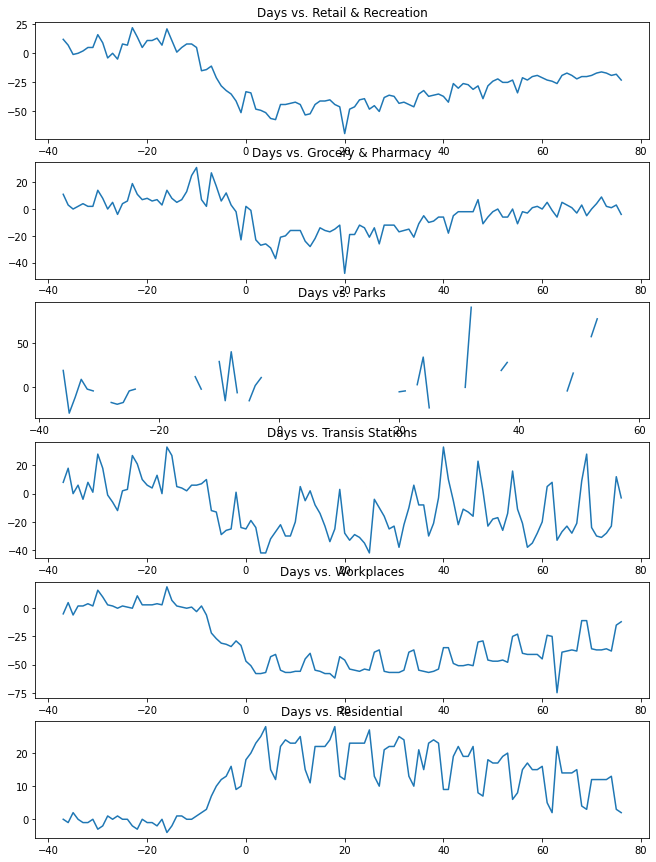

In [19]:
# TODO Q9
fig, axs = plt.subplots(6, figsize=(11, 15))

# plot retail_and_recreation_percent_change_from_baseline
axs[0].plot(days_since_stay_home_order, 
            df_subset['retail_and_recreation_percent_change_from_baseline'])
axs[0].set_title("Days vs. Retail & Recreation")

# Plot grocery_and_pharmacy_percent_change_from_baseline
axs[1].plot(days_since_stay_home_order, 
            df_subset['grocery_and_pharmacy_percent_change_from_baseline'])
axs[1].set_title("Days vs. Grocery & Pharmacy")

# Plot parks_percent_change_from_baseline
axs[2].plot(days_since_stay_home_order, 
            df_subset['parks_percent_change_from_baseline'])
axs[2].set_title("Days vs. Parks")

# Plot transit_stations_percent_change_from_baseline
axs[3].plot(days_since_stay_home_order, 
            df_subset['transit_stations_percent_change_from_baseline'])
axs[3].set_title("Days vs. Transis Stations")

# Plot workplaces_percent_change_from_baseline
axs[4].plot(days_since_stay_home_order, 
            df_subset['workplaces_percent_change_from_baseline'])
axs[4].set_title("Days vs. Workplaces")

# Plot residential_percent_change_from_baseline
axs[5].plot(days_since_stay_home_order, 
            df_subset['residential_percent_change_from_baseline'])
axs[5].set_title("Days vs. Residential")

# fig.set_size_inches(11,15)

**TODO** Q10: Answer the following question: Do the results seem to
satisfy “common sense”? Explain, citing specific data from your plot to
support your answer.

**Answer for Q10:**
The "grocery and pharmacy" seems satisfy "common sense". Before the state government announced "stay at home" order, people began to feel afraid and started storing grocery and pharmacy (i.e rubbing alcohol). However, since the order ending on April 20 (around 30 days after the order announced), the amount of grocery and pharmacy increased and speeding up gradually. 

**TODO** Q11: In the [Calibrate
Region](https://support.google.com/covid19-mobility/checklist/9834261?hl=en&ref_topic=9822927)
checklist, Google suggests a number of reasons why the data might *not*
be useful for understanding the effect of COVID-19-related lockdowns, or
why the data might be misleading. For the location you have chosen,
briefly answer all of the questions in that checklist. Based on your
answers, do you think there are any serious problems associated with
using this data for understanding user mobility changes due to COVID-19?

**Answer for Q11:**
The location I have chosen might not be useful for understanding the effect of COVID-19-related lockdowns. 

*  **Did anything significant happen between Jan 3 and Feb 6, 2020?**
There's no significant weather change or big events in Indiana between Jan 3 to Feb 6. The university started its spring semester on Jan 11, and many out-state and international students came back before Jan 11. However, in Indiana, such significant people mobility only happens around cities/counties with universities, and there are still many places that do not have such considerable population mobility. Such significant population mobility may cause the chosen baseline to change.
*  **How do park visitors change from January to now?** Although there is missing data in Tippecanoe County, there are still some higher percentages than 0, which means park visitors increase from January to now. It is general in other places in Indiana.
*  **How much more time do you think people will spend in residential places?** People spent 10% to 20% more time in their residential areas on average. Students and teachers spend more time since the school was closed, and other people's working time didn't change a lot.
*  **How might types of work affect the mobility changes on weekdays or weekends?** Professors and students started stayed at home and took online courses because of the campus closed. Thus, for these people, weekdays and weekends seem to become not as apparent as before. 
*  **How well is your region represented?** There are fewer sightseeings and famous state parks in Tippecanoe County. Most visitors come in application seasons and graduation seasons. There are no military bases in Tippecanoe County, and there are not many people who work in government buildings, which does not affect Google to collect user data apparently.


